In [1]:
pip install koreanize-matplotlib

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.9/7.9 MB 25.3 MB/s eta 0:00:00


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import koreanize_matplotlib
import seaborn as sns
import numpy as np

In [3]:
seoul = [
    '종로구', '중구', '용산구', '성동구', '광진구', '동대문구', '중랑구', '성북구', '강북구',
    '도봉구', '노원구', '은평구', '서대문구', '마포구', '양천구', '강서구', '구로구', '금천구',
    '영등포구', '동작구', '관악구', '서초구', '강남구', '송파구', '강동구'
]

df = pd.DataFrame()
df['자치구 이름'] = seoul
df.head()

,자치구 이름
0,종로구
1,중구
2,용산구
3,성동구
4,광진구


# 안전 및 치안

In [4]:
df1 = pd.read_excel("/content/5대+범죄+발생현황_20250204132831.xlsx")
df1.head(6)

/usr/local/lib/python3.11/dist-packages/openpyxl/styles/stylesheet.py:237: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


,자치구별(1),자치구별(2),2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
0,자치구별(1),자치구별(2),합계,합계,합계,합계,합계,합계,합계,합계,합계,합계
1,자치구별(1),자치구별(2),발생,발생,발생,발생,발생,발생,발생,발생,발생,발생
2,합계,소계,130674,126401,117839,107835,101948,103668,92679,80445,90399,86213
3,NaN,종로구,5021,4705,4459,4057,3690,3846,3102,2712,3138,2981
4,NaN,중구,5231,4954,4584,4184,4030,4327,3411,2861,3071,3348
5,NaN,용산구,3799,3820,4137,4060,3411,3313,2969,2381,2967,3021


In [5]:
df1 = df1.drop(index=[0,1,2], columns=['자치구별(1)']).reset_index(drop=True)
df1.head(6)

,자치구별(2),2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
0,종로구,5021,4705,4459,4057,3690,3846,3102,2712,3138,2981
1,중구,5231,4954,4584,4184,4030,4327,3411,2861,3071,3348
2,용산구,3799,3820,4137,4060,3411,3313,2969,2381,2967,3021
3,성동구,3582,3358,3026,2767,2457,2512,2362,2112,2194,2023
4,광진구,6268,5909,5322,4646,3915,4011,3601,3087,3619,3424
5,동대문구,4363,4720,4787,3975,3680,3692,3401,2959,3253,2957


In [6]:
# df의 [자치구 이름] 기준으로 병합
df = df.merge(df1, left_on="자치구 이름", right_on="자치구별(2)", how="left")
df = df.drop(columns=["자치구별(2)"])
df.head()

,자치구 이름,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
0,종로구,5021,4705,4459,4057,3690,3846,3102,2712,3138,2981
1,중구,5231,4954,4584,4184,4030,4327,3411,2861,3071,3348
2,용산구,3799,3820,4137,4060,3411,3313,2969,2381,2967,3021
3,성동구,3582,3358,3026,2767,2457,2512,2362,2112,2194,2023
4,광진구,6268,5909,5322,4646,3915,4011,3601,3087,3619,3424


In [7]:
new_columns = ['자치구 이름', '2014년 범죄 발생 건수', '2015년 범죄 발생 건수', '2016년 범죄 발생 건수', '2017년 범죄 발생 건수',
               '2018년 범죄 발생 건수', '2019년 범죄 발생 건수', '2020년 범죄 발생 건수', '2021년 범죄 발생 건수', '2022년 범죄 발생 건수', '2023년 범죄 발생 건수']
df.columns = new_columns

df.head()

,자치구 이름,2014년 범죄 발생 건수,2015년 범죄 발생 건수,2016년 범죄 발생 건수,2017년 범죄 발생 건수,2018년 범죄 발생 건수,2019년 범죄 발생 건수,2020년 범죄 발생 건수,2021년 범죄 발생 건수,2022년 범죄 발생 건수,2023년 범죄 발생 건수
0,종로구,5021,4705,4459,4057,3690,3846,3102,2712,3138,2981
1,중구,5231,4954,4584,4184,4030,4327,3411,2861,3071,3348
2,용산구,3799,3820,4137,4060,3411,3313,2969,2381,2967,3021
3,성동구,3582,3358,3026,2767,2457,2512,2362,2112,2194,2023
4,광진구,6268,5909,5322,4646,3915,4011,3601,3087,3619,3424


In [8]:
# 자치구 제외 다른 모든 칼럼 => 숫자형으로
for column in new_columns[1:]:
    df[column] = pd.to_numeric(df[column], errors='coerce')

In [9]:
##  범죄 발생 빈도 지도용
def crime(crime_count):
    if crime_count >= df['2023년 범죄 발생 건수'].nlargest(7).min():
        return '높음'
    elif crime_count >= df['2023년 범죄 발생 건수'].nlargest(11).min():
        return '보통'
    else:
        return '낮음'

df['범죄 발생 빈도'] = df['2023년 범죄 발생 건수'].apply(crime)

In [10]:
df.head()

,자치구 이름,2014년 범죄 발생 건수,2015년 범죄 발생 건수,2016년 범죄 발생 건수,2017년 범죄 발생 건수,2018년 범죄 발생 건수,2019년 범죄 발생 건수,2020년 범죄 발생 건수,2021년 범죄 발생 건수,2022년 범죄 발생 건수,2023년 범죄 발생 건수,범죄 발생 빈도
0,종로구,5021,4705,4459,4057,3690,3846,3102,2712,3138,2981,낮음
1,중구,5231,4954,4584,4184,4030,4327,3411,2861,3071,3348,낮음
2,용산구,3799,3820,4137,4060,3411,3313,2969,2381,2967,3021,낮음
3,성동구,3582,3358,3026,2767,2457,2512,2362,2112,2194,2023,낮음
4,광진구,6268,5909,5322,4646,3915,4011,3601,3087,3619,3424,보통


In [11]:
## CCTV 총계
df1 = pd.read_excel('/content/drive/MyDrive/GDGoc/서울시 자치구 (목적별) CCTV 설치현황_241231.xlsx')
df1.head(7)

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11
0,NaN,"(단위 : 대, '24.12.31. 기준)",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,구 분,CCTV 총계,범죄예방 및 수사,NaN,NaN,NaN,NaN,시설안전\n·\n화재예방,교통단속,교통정보수집\n·\n분석,기타\n목적
2,NaN,NaN,NaN,소 계,방범,어린이\n보호구역,공원·놀이터,쓰레기\n무단투기,NaN,NaN,NaN,NaN
3,NaN,자치구,113273,99758,74807,8704,15417,830,4482,8648,18,367
4,NaN,종로구,2339,2154,1779,105,270,0,52,133,0,0
5,NaN,중구,3118,2567,2132,76,297,62,221,330,0,0
6,NaN,용산구,3609,3202,2669,162,371,0,5,402,0,0


In [12]:
df1 = df1.drop(index=[0,1,2,3], columns=['Unnamed: 0']).reset_index(drop=True)
df1.head()

,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11
0,종로구,2339,2154,1779,105,270,0,52,133,0,0
1,중구,3118,2567,2132,76,297,62,221,330,0,0
2,용산구,3609,3202,2669,162,371,0,5,402,0,0
3,성동구,4638,4084,2994,422,429,239,115,439,0,0
4,광진구,4636,4370,3102,642,561,65,174,92,0,0


In [13]:
df1['Unnamed: 1'].unique()

array(['종로구', '중구', '용산구', '성동구', '광진구', '동대문', '중랑구', '성북구', '강북구',
       '도봉구', '노원구', '은평구', '서대문', '마포구', '양천구', '강서구', '구로구', '금천구',
       '영등포', '동작구', '관악구', '서초구', '강남구', '송파구', '강동구', nan,
       '※ 서울특별시 각 자치구의 CCTV 통합관제센터에 연계된 목적별 CCTV 현황입니다. (미연계 CCTV 수량 제외)'],
      dtype=object)

In [14]:
## 이 CCTV 데이터의 자치구 이름이 df와 다른 부분이 있어, 수정
df1['Unnamed: 1'] = df1['Unnamed: 1'].replace('동대문', '동대문구')
df1['Unnamed: 1'] = df1['Unnamed: 1'].replace('남대문', '남대문구')
df1['Unnamed: 1'] = df1['Unnamed: 1'].replace('서대문', '서대문구')
df1['Unnamed: 1'] = df1['Unnamed: 1'].replace('영등포', '영등포구')

# df의 [자치구 이름] 기준으로 병합
df = df.merge(df1[['Unnamed: 1', 'Unnamed: 2']], left_on="자치구 이름", right_on="Unnamed: 1", how="left")
df = df.drop(columns=["Unnamed: 1"])
df.rename(columns={"Unnamed: 2": "cctv"}, inplace=True)
df.head()

,자치구 이름,2014년 범죄 발생 건수,2015년 범죄 발생 건수,2016년 범죄 발생 건수,2017년 범죄 발생 건수,2018년 범죄 발생 건수,2019년 범죄 발생 건수,2020년 범죄 발생 건수,2021년 범죄 발생 건수,2022년 범죄 발생 건수,2023년 범죄 발생 건수,범죄 발생 빈도,cctv
0,종로구,5021,4705,4459,4057,3690,3846,3102,2712,3138,2981,낮음,2339
1,중구,5231,4954,4584,4184,4030,4327,3411,2861,3071,3348,낮음,3118
2,용산구,3799,3820,4137,4060,3411,3313,2969,2381,2967,3021,낮음,3609
3,성동구,3582,3358,3026,2767,2457,2512,2362,2112,2194,2023,낮음,4638
4,광진구,6268,5909,5322,4646,3915,4011,3601,3087,3619,3424,보통,4636


In [15]:
## 경찰서, 소방서 개수
df1 = pd.read_excel("/content/drive/MyDrive/GDGoc/2/시내주요기관(경찰·소방관서)_20250123024500.xlsx")
df1.head()

/usr/local/lib/python3.11/dist-packages/openpyxl/styles/stylesheet.py:237: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


,자치구별(1),자치구별(2),2023,2023.1,2023.2,2023.3,2023.4,2023.5
0,자치구별(1),자치구별(2),경찰청,경찰서,지구대파출소치안센터,소방본부,소방서,119안전센터
1,합계,소계,2,31,298,1,25,119
2,NaN,종로구,1,2,22,-,1,6
3,NaN,중구,-,2,16,1,1,5
4,NaN,용산구,-,1,11,-,1,5


In [16]:
df1.columns = df1.iloc[0]
df1 = df1.drop(index=[0,1],columns = ['자치구별(1)']).reset_index(drop=True)
df1.head()

,자치구별(2),경찰청,경찰서,지구대파출소치안센터,소방본부,소방서,119안전센터
0,종로구,1,2,22,-,1,6
1,중구,-,2,16,1,1,5
2,용산구,-,1,11,-,1,5
3,성동구,-,1,10,-,1,4
4,광진구,-,1,12,-,1,3


In [17]:
df1[['경찰청', '경찰서', '지구대파출소치안센터', '소방본부', '소방서', '119안전센터']] = df1[['경찰청', '경찰서', '지구대파출소치안센터', '소방본부', '소방서', '119안전센터']].apply(pd.to_numeric, errors='coerce')
df1.fillna(0, inplace=True)  # NaN 값을 0으로 변환

# 새로운 데이터프레임에 각 개수값을 합친 데이터 넣기
df2 = pd.DataFrame()
df2['자치구별'] = df1['자치구별(2)']
df2['경찰서 개수'] = df1['경찰청'] + df1['경찰서'] + df1['지구대파출소치안센터']
df2['소방서 개수'] = df1['소방본부'] + df1['소방서'] + df1['119안전센터']

In [18]:
df2.head()

,자치구별,경찰서 개수,소방서 개수
0,종로구,25.0,7.0
1,중구,18.0,7.0
2,용산구,12.0,6.0
3,성동구,11.0,5.0
4,광진구,13.0,4.0


In [19]:
# df의 [자치구 이름] 기준으로 병합
df = df.merge(df2, left_on="자치구 이름", right_on="자치구별", how="left")
df = df.drop(columns=["자치구별"])
df.head()

,자치구 이름,2014년 범죄 발생 건수,2015년 범죄 발생 건수,2016년 범죄 발생 건수,2017년 범죄 발생 건수,2018년 범죄 발생 건수,2019년 범죄 발생 건수,2020년 범죄 발생 건수,2021년 범죄 발생 건수,2022년 범죄 발생 건수,2023년 범죄 발생 건수,범죄 발생 빈도,cctv,경찰서 개수,소방서 개수
0,종로구,5021,4705,4459,4057,3690,3846,3102,2712,3138,2981,낮음,2339,25.0,7.0
1,중구,5231,4954,4584,4184,4030,4327,3411,2861,3071,3348,낮음,3118,18.0,7.0
2,용산구,3799,3820,4137,4060,3411,3313,2969,2381,2967,3021,낮음,3609,12.0,6.0
3,성동구,3582,3358,3026,2767,2457,2512,2362,2112,2194,2023,낮음,4638,11.0,5.0
4,광진구,6268,5909,5322,4646,3915,4011,3601,3087,3619,3424,보통,4636,13.0,4.0


In [20]:
from sklearn.preprocessing import MinMaxScaler

column = ["2023년 범죄 발생 건수", "cctv", "경찰서 개수", "소방서 개수"]

# MinMaxScaler 적용한 데이터 프레임 생성
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(df[column])
scaled_df = pd.DataFrame(scaled_data, columns=column)

scaled_df["2023년 범죄 발생 건수"] = 1 - scaled_df["2023년 범죄 발생 건수"] # 범죄율은 낮을수록 높은 점수

# 가중치
weights = {
    "2023년 범죄 발생 건수": 0.25,
    "cctv": 0.25,
    "경찰서 개수": 0.25,
    "소방서 개수": 0.25,
}

df["종합 안전/치안 점수"] = (
    scaled_df["2023년 범죄 발생 건수"] * weights["2023년 범죄 발생 건수"] +
    scaled_df["cctv"] * weights["cctv"] +
    scaled_df["경찰서 개수"] * weights["경찰서 개수"] +
    scaled_df["소방서 개수"] * weights["소방서 개수"]
)

# 순위 부여
df["안전 치안 순위"] = df["종합 안전/치안 점수"].rank(ascending=False, method="min").astype(int)

In [21]:
df

,자치구 이름,2014년 범죄 발생 건수,2015년 범죄 발생 건수,2016년 범죄 발생 건수,2017년 범죄 발생 건수,2018년 범죄 발생 건수,2019년 범죄 발생 건수,2020년 범죄 발생 건수,2021년 범죄 발생 건수,2022년 범죄 발생 건수,2023년 범죄 발생 건수,범죄 발생 빈도,cctv,경찰서 개수,소방서 개수,종합 안전/치안 점수,안전 치안 순위
0,종로구,5021,4705,4459,4057,3690,3846,3102,2712,3138,2981,낮음,2339,25.0,7.0,0.695271,1
1,중구,5231,4954,4584,4184,4030,4327,3411,2861,3071,3348,낮음,3118,18.0,7.0,0.605769,5
2,용산구,3799,3820,4137,4060,3411,3313,2969,2381,2967,3021,낮음,3609,12.0,6.0,0.492331,16
3,성동구,3582,3358,3026,2767,2457,2512,2362,2112,2194,2023,낮음,4638,11.0,5.0,0.509436,14
4,광진구,6268,5909,5322,4646,3915,4011,3601,3087,3619,3424,보통,4636,13.0,4.0,0.403929,24
5,동대문구,4363,4720,4787,3975,3680,3692,3401,2959,3253,2957,낮음,3846,14.0,6.0,0.534901,8
6,중랑구,5353,5193,5041,4571,4288,4268,3726,3210,3599,3324,낮음,5392,10.0,5.0,0.458906,20
7,성북구,4606,4154,3744,3434,3042,2877,2567,2411,2749,2411,낮음,4906,16.0,5.0,0.574075,6
8,강북구,4030,4257,4229,3393,3437,3838,2770,2301,2832,2497,낮음,3584,13.0,5.0,0.470552,18
9,도봉구,3124,2664,2438,1999,2249,2110,2179,1860,2141,1921,낮음,2808,10.0,5.0,0.423911,22


# 부동산

In [22]:
 ## 월세가격
 df1 =pd.read_csv(f"/content/drive/MyDrive/GDGoc/서울시 부동산 전월세가 정보.csv", encoding ="cp949", low_memory=False)
 df1.head()

,접수연도,자치구코드,자치구명,법정동코드,법정동명,지번구분,지번구분명,본번,부번,층,...,보증금(만원),임대료(만원),건물명,건축년도,건물용도,계약기간,신규갱신여부,계약갱신권사용여부,종전 보증금,종전 임대료
0,2025,11470,양천구,10300,신월동,NaN,NaN,NaN,NaN,NaN,...,1000,60,NaN,1994.0,단독다가구,25.01~27.01,신규,NaN,NaN,NaN
1,2025,11215,광진구,10200,능동,NaN,NaN,NaN,NaN,NaN,...,10000,15,NaN,2010.0,단독다가구,25.03~27.03,신규,NaN,NaN,NaN
2,2025,11140,중구,17100,중림동,NaN,NaN,NaN,NaN,NaN,...,3000,60,NaN,1990.0,단독다가구,25.02~27.02,신규,NaN,NaN,NaN
3,2025,11215,광진구,10700,화양동,NaN,NaN,NaN,NaN,NaN,...,2000,60,NaN,1986.0,단독다가구,25.01~26.02,신규,NaN,NaN,NaN
4,2025,11170,용산구,10100,후암동,NaN,NaN,NaN,NaN,NaN,...,1000,80,NaN,1992.0,단독다가구,25.02~27.02,신규,NaN,NaN,NaN


In [23]:
df2 =  df1[df1['전월세 구분'] == '월세'].reset_index(drop=True)
df2 =  df1[df1['건물용도'] == '아파트'].reset_index(drop=True)
df2.head()

,접수연도,자치구코드,자치구명,법정동코드,법정동명,지번구분,지번구분명,본번,부번,층,...,보증금(만원),임대료(만원),건물명,건축년도,건물용도,계약기간,신규갱신여부,계약갱신권사용여부,종전 보증금,종전 임대료
0,2025,11710,송파구,10700,가락동,1.0,대지,140.0,0.0,5.0,...,60000,0,가락(1차)쌍용아파트,1997.0,아파트,25.01~27.01,신규,NaN,NaN,NaN
1,2025,11380,은평구,10400,갈현동,1.0,대지,549.0,0.0,7.0,...,15000,6,대한웰빙홈,2018.0,아파트,25.03~27.03,신규,NaN,NaN,NaN
2,2025,11680,강남구,10300,개포동,1.0,대지,12.0,0.0,1.0,...,52000,0,성원대치2단지아파트,1992.0,아파트,25.03~27.03,신규,NaN,NaN,NaN
3,2025,11500,강서구,10300,화곡동,1.0,대지,143.0,11.0,6.0,...,16100,18,성재센트리움아파트,2017.0,아파트,25.03~27.03,신규,NaN,NaN,NaN
4,2025,11500,강서구,10400,가양동,1.0,대지,1461.0,0.0,14.0,...,21000,0,가양2단지(성지),1992.0,아파트,25.04~27.04,신규,NaN,NaN,NaN


In [24]:
df3 =  df1[df1['전월세 구분'] == '전세'].reset_index(drop=True)
df3.head()

,접수연도,자치구코드,자치구명,법정동코드,법정동명,지번구분,지번구분명,본번,부번,층,...,보증금(만원),임대료(만원),건물명,건축년도,건물용도,계약기간,신규갱신여부,계약갱신권사용여부,종전 보증금,종전 임대료
0,2025,11440,마포구,12300,망원동,NaN,NaN,NaN,NaN,NaN,...,15000,0,NaN,1995.0,단독다가구,25.01~27.01,신규,NaN,NaN,NaN
1,2025,11710,송파구,10400,송파동,1.0,대지,110.0,19.0,1.0,...,27000,0,(110-19),2008.0,연립다세대,25.01~27.01,갱신,NaN,26000.0,NaN
2,2025,11740,강동구,10500,길동,NaN,NaN,NaN,NaN,NaN,...,15000,0,NaN,1997.0,단독다가구,25.02~27.02,신규,NaN,NaN,NaN
3,2025,11710,송파구,10700,가락동,1.0,대지,140.0,0.0,5.0,...,60000,0,가락(1차)쌍용아파트,1997.0,아파트,25.01~27.01,신규,NaN,NaN,NaN
4,2025,11680,강남구,10300,개포동,1.0,대지,12.0,0.0,1.0,...,52000,0,성원대치2단지아파트,1992.0,아파트,25.03~27.03,신규,NaN,NaN,NaN


In [25]:
df2['평당 임대료(만원)'] = df2['임대료(만원)']/df2['임대면적(㎡)']*3.3
df2 = df2[['자치구명', '평당 임대료(만원)']]
df4 = df2.groupby(['자치구명'])[['평당 임대료(만원)']].mean().reset_index()
df4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   자치구명        25 non-null     object 
 1   평당 임대료(만원)  25 non-null     float64
dtypes: float64(1), object(1)
memory usage: 532.0+ bytes


In [26]:
# df의 [자치구 이름] 기준으로 병합
df = df.merge(df4, left_on="자치구 이름", right_on="자치구명", how="left")
df = df.drop(columns=["자치구명"])
df = df.rename(columns={'평당 임대료(만원)': '평당 월세(만원)'})
df.head()

,자치구 이름,2014년 범죄 발생 건수,2015년 범죄 발생 건수,2016년 범죄 발생 건수,2017년 범죄 발생 건수,2018년 범죄 발생 건수,2019년 범죄 발생 건수,2020년 범죄 발생 건수,2021년 범죄 발생 건수,2022년 범죄 발생 건수,2023년 범죄 발생 건수,범죄 발생 빈도,cctv,경찰서 개수,소방서 개수,종합 안전/치안 점수,안전 치안 순위,평당 월세(만원)
0,종로구,5021,4705,4459,4057,3690,3846,3102,2712,3138,2981,낮음,2339,25.0,7.0,0.695271,1,3.337163
1,중구,5231,4954,4584,4184,4030,4327,3411,2861,3071,3348,낮음,3118,18.0,7.0,0.605769,5,3.858064
2,용산구,3799,3820,4137,4060,3411,3313,2969,2381,2967,3021,낮음,3609,12.0,6.0,0.492331,16,3.128618
3,성동구,3582,3358,3026,2767,2457,2512,2362,2112,2194,2023,낮음,4638,11.0,5.0,0.509436,14,3.030685
4,광진구,6268,5909,5322,4646,3915,4011,3601,3087,3619,3424,보통,4636,13.0,4.0,0.403929,24,3.182791


In [27]:
## 전세 가격
df1 = pd.read_excel("/content/drive/MyDrive/GDGoc/아파트 ㎡당 전세평균가격_20250127.xlsx")
df1.head()

,지역명,2020-01-01 09:00:52,2020-02-01 09:00:52,2020-03-01 09:00:52,2020-04-01 09:00:52,2020-05-01 09:00:52,2020-06-01 09:00:52,2020-07-01 09:00:52,2020-08-01 09:00:52,2020-09-01 09:00:52,...,2024-04-01 09:00:52,2024-05-01 09:00:52,2024-06-01 09:00:52,2024-07-01 09:00:52,2024-08-01 09:00:52,2024-09-01 09:00:52,2024-10-01 09:00:52,2024-11-01 09:00:52,2024-12-01 09:00:52,2025-01-01 09:00:52
0,전국,288.0272,289.5742,291.3197,292.0316,292.7192,295.2715,298.7174,302.8858,311.0848,...,363.136661,364.204211,365.591591,367.609136,369.753116,371.561195,373.016183,374.838606,376.280617,376.750466
1,서울,550.2815,553.4347,556.9596,558.2449,559.7211,565.1724,574.1157,584.5937,603.7822,...,716.454904,719.967415,724.883750,732.687019,740.045334,745.662864,749.164287,754.780614,759.252786,760.303349
2,강북14개구,473.2382,475.093,478.2605,480.1193,481.5865,486.0234,492.5942,501.43,520.7872,...,630.398333,633.605787,638.616449,646.351363,654.004303,659.106576,662.167475,664.883286,668.526999,669.250633
3,종로구,536.6703,540.3248,547.3763,547.4475,551.8721,556.9843,559.636,565.1873,584.9842,...,798.523156,800.679892,801.948317,805.572589,808.802319,819.927214,830.644260,836.115972,833.347423,834.325031
4,중구,639.5974,640.4136,643.6623,643.7144,645.3765,650.8092,654.3594,674.8504,685.6151,...,765.910380,774.157980,779.187199,785.108066,808.529187,814.621162,815.470359,818.655240,826.359692,828.479969


In [28]:
df1.columns = df1.columns.astype(str)  # 열 이름을 문자열로 변환
df1 = df1.iloc[3:29]
df1 = df1.drop(index=[17])  # 불필요한 행 제거
df1 = df1.reset_index(drop=True)  # 인덱스를 0부터 다시 설정
df2 = df1[['지역명', '2025-01-01 09:00:52']]
df2['2025-01-01 09:00:52'] = df2['2025-01-01 09:00:52']*3.3

<ipython-input-28-b32c341e034f>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['2025-01-01 09:00:52'] = df2['2025-01-01 09:00:52']*3.3


In [29]:
# df의 [자치구 이름] 기준으로 병합
df = df.merge(df2, left_on="자치구 이름", right_on="지역명", how="left")
df = df.drop(columns=["지역명"])
df = df.rename(columns={'2025-01-01 09:00:52': '평당 전세(만원)'})
df.head()

,자치구 이름,2014년 범죄 발생 건수,2015년 범죄 발생 건수,2016년 범죄 발생 건수,2017년 범죄 발생 건수,2018년 범죄 발생 건수,2019년 범죄 발생 건수,2020년 범죄 발생 건수,2021년 범죄 발생 건수,2022년 범죄 발생 건수,2023년 범죄 발생 건수,범죄 발생 빈도,cctv,경찰서 개수,소방서 개수,종합 안전/치안 점수,안전 치안 순위,평당 월세(만원),평당 전세(만원)
0,종로구,5021,4705,4459,4057,3690,3846,3102,2712,3138,2981,낮음,2339,25.0,7.0,0.695271,1,3.337163,2753.272601
1,중구,5231,4954,4584,4184,4030,4327,3411,2861,3071,3348,낮음,3118,18.0,7.0,0.605769,5,3.858064,2733.983897
2,용산구,3799,3820,4137,4060,3411,3313,2969,2381,2967,3021,낮음,3609,12.0,6.0,0.492331,16,3.128618,3006.407287
3,성동구,3582,3358,3026,2767,2457,2512,2362,2112,2194,2023,낮음,4638,11.0,5.0,0.509436,14,3.030685,2980.349216
4,광진구,6268,5909,5322,4646,3915,4011,3601,3087,3619,3424,보통,4636,13.0,4.0,0.403929,24,3.182791,2734.184677


In [30]:
## 평균 실거래가
### 자치구별로 파일이 달라, 자치구 이름을 최종 데이터 프레임에서 가져와, 평균을 계산해서 추가하도록

for i in range(0,25):
  seoul = df['자치구 이름'][i]
  df1 =pd.read_csv(f"/content/drive/MyDrive/GDGoc/1/새 폴더/서울시 부동산 실거래가 정보_{seoul}.csv", encoding ="cp949", low_memory=False)
  df1['계약연월'] = df1['계약일'].astype(str).str[2:6]

  # 2024, 2025년만 필터링
  df2 = df1[df1['계약연월'].str[:2].isin(['24', '25'])]
  df2 = df2.drop(columns=['계약일'])
  df2['평당가격(만원)'] = df2['물건금액(만원)'] / (df2['건물면적(㎡)'] / 3.3)
  df1['평당 가격'] = df1['물건금액(만원)']/df1['건물면적(㎡)']*3.3

  # 계약연월별 평균 평당 가격
  df3 = df2.groupby(['계약연월'])['평당가격(만원)'].mean().reset_index()

  df3['자치구 이름'] = seoul
  df3_1 = df3.pivot(index='자치구 이름', columns='계약연월', values='평당가격(만원)').reset_index()

  # 매매가 컬럼명 변경 ("2401 매매", "2402 매매" 형태)
  df3_1.columns = ['자치구 이름'] + [f"{col} 매매" for col in df3_1.columns[1:]]

  # 자치구별 데이터 병합
  if df4.empty:
      df4 = df3_1
  else:
      df4 = pd.concat([df4, df3_1], ignore_index=True)


In [31]:
df4

,자치구명,평당 임대료(만원),자치구 이름,2401 매매,2402 매매,2403 매매,2404 매매,2405 매매,2406 매매,2407 매매,2408 매매,2409 매매,2410 매매,2411 매매,2412 매매,2501 매매
0,강남구,4.318410,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,강동구,2.196162,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,강북구,4.054114,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,강서구,1.963671,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,관악구,3.171646,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,광진구,3.182791,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,구로구,1.839102,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,금천구,1.684904,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,노원구,1.993116,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,도봉구,1.998839,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [32]:
# df의 [자치구 이름] 기준으로 병합
df = df.merge(df4, left_on="자치구 이름", right_on="자치구 이름", how="left")

df.head()

,자치구 이름,2014년 범죄 발생 건수,2015년 범죄 발생 건수,2016년 범죄 발생 건수,2017년 범죄 발생 건수,2018년 범죄 발생 건수,2019년 범죄 발생 건수,2020년 범죄 발생 건수,2021년 범죄 발생 건수,2022년 범죄 발생 건수,...,2404 매매,2405 매매,2406 매매,2407 매매,2408 매매,2409 매매,2410 매매,2411 매매,2412 매매,2501 매매
0,종로구,5021,4705,4459,4057,3690,3846,3102,2712,3138,...,3228.879067,4011.393210,3906.150739,4027.478615,3332.777838,3480.367593,3178.405187,3455.495223,2861.189054,2605.190874
1,중구,5231,4954,4584,4184,4030,4327,3411,2861,3071,...,4653.040055,4084.886151,4558.281914,4555.177774,4428.558880,3856.869952,4401.257955,4588.326967,4578.814436,4180.284515
2,용산구,3799,3820,4137,4060,3411,3313,2969,2381,2967,...,6204.638348,6299.861938,6841.334034,6724.721853,7067.634353,6379.627144,6465.803549,6806.047137,6595.514045,4917.774617
3,성동구,3582,3358,3026,2767,2457,2512,2362,2112,2194,...,5493.368756,5752.913909,5948.458139,6368.931398,5624.579517,5876.858071,5663.667026,5574.142683,5353.897585,5435.374542
4,광진구,6268,5909,5322,4646,3915,4011,3601,3087,3619,...,3860.879709,3725.474791,4346.805495,4375.931926,4571.987345,4106.219689,4072.691157,4283.536372,4179.022446,4317.487512


In [33]:
df['1년전 매매가 차이'] = df['2501 매매']-df['2401 매매']

In [34]:
df

,자치구 이름,2014년 범죄 발생 건수,2015년 범죄 발생 건수,2016년 범죄 발생 건수,2017년 범죄 발생 건수,2018년 범죄 발생 건수,2019년 범죄 발생 건수,2020년 범죄 발생 건수,2021년 범죄 발생 건수,2022년 범죄 발생 건수,...,2405 매매,2406 매매,2407 매매,2408 매매,2409 매매,2410 매매,2411 매매,2412 매매,2501 매매,1년전 매매가 차이
0,종로구,5021,4705,4459,4057,3690,3846,3102,2712,3138,...,4011.393210,3906.150739,4027.478615,3332.777838,3480.367593,3178.405187,3455.495223,2861.189054,2605.190874,-648.194265
1,중구,5231,4954,4584,4184,4030,4327,3411,2861,3071,...,4084.886151,4558.281914,4555.177774,4428.558880,3856.869952,4401.257955,4588.326967,4578.814436,4180.284515,196.720104
2,용산구,3799,3820,4137,4060,3411,3313,2969,2381,2967,...,6299.861938,6841.334034,6724.721853,7067.634353,6379.627144,6465.803549,6806.047137,6595.514045,4917.774617,-1278.832209
3,성동구,3582,3358,3026,2767,2457,2512,2362,2112,2194,...,5752.913909,5948.458139,6368.931398,5624.579517,5876.858071,5663.667026,5574.142683,5353.897585,5435.374542,83.794500
4,광진구,6268,5909,5322,4646,3915,4011,3601,3087,3619,...,3725.474791,4346.805495,4375.931926,4571.987345,4106.219689,4072.691157,4283.536372,4179.022446,4317.487512,782.150716
5,동대문구,4363,4720,4787,3975,3680,3692,3401,2959,3253,...,3369.754400,3775.281429,3854.120630,3745.693225,3659.163092,3263.926768,3888.583924,3609.690072,3736.269537,583.206412
6,중랑구,5353,5193,5041,4571,4288,4268,3726,3210,3599,...,2832.501359,2825.060049,2961.314348,3032.624170,2843.829928,2840.274886,2870.569600,2890.166775,2709.574949,83.354233
7,성북구,4606,4154,3744,3434,3042,2877,2567,2411,2749,...,3164.970493,3595.663145,3465.000335,3324.311749,3225.421544,3030.280738,3008.622474,3002.433538,2910.689642,-204.357028
8,강북구,4030,4257,4229,3393,3437,3838,2770,2301,2832,...,2350.297146,2239.815129,2421.715805,2474.937507,2272.309030,2334.561454,2174.649860,2306.712256,1836.172264,-92.033324
9,도봉구,3124,2664,2438,1999,2249,2110,2179,1860,2141,...,2011.364313,2319.474621,2328.675969,2388.706691,2023.487229,2148.041704,2074.076919,2226.251760,1959.169624,-46.052177


# 교통

In [35]:
##대중교통 이용
df1 = pd.read_excel("/content/drive/MyDrive/GDGoc/서울특별시_자치구별 이용자유형별 대중교통 이용건수_20231231.xlsx")
df1.head()

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,(단위 : 건)
0,구분별(1),구분별(2),구분별(3),소계,버스,지하철,택시4)
1,서울시,유형별1),일반,2877060972,1262881864,1368604808,245574300
2,NaN,NaN,어린이,46646647,31942886,14703761,-
3,NaN,NaN,청소년,115818548,70398757,45419791,-
4,NaN,NaN,경로,260428777,47192095,213236682,-


In [36]:
df1.columns = df1.iloc[0]  # 헤더 설정
df1 = df1.drop(index=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11], columns = ['구분별(1)',	'구분별(2)']).reset_index(drop=True)  # 불필요한 행 제거
df1[['소계',	'버스',	'지하철',	'택시4)']] = df1[['소계',	'버스',	'지하철',	'택시4)']].apply(pd.to_numeric, errors='coerce')

In [37]:
# 새로운 데이터프레임에 각 개수값을 합친 데이터 넣기
df2 = pd.DataFrame()
df2['자치구별'] = df1['구분별(3)']
df2['버스 이용 비율'] = (df1['버스'] / df1['소계'] * 100).round(2)
df2['지하철 이용 비율'] = (df1['지하철'] / df1['소계'] * 100).round(2)
df2['택시 이용 비율'] = (df1['택시4)'] / df1['소계'] * 100).round(2)

df2.head()

,자치구별,버스 이용 비율,지하철 이용 비율,택시 이용 비율
0,종로구,40.79,53.45,5.76
1,중구,26.15,67.36,6.49
2,용산구,50.45,37.15,12.40
3,성동구,32.84,58.77,8.39
4,광진구,31.19,59.16,9.65


In [38]:
# df의 [자치구 이름] 기준으로 병합
df = df.merge(df2, left_on="자치구 이름", right_on="자치구별", how="left")
df = df.drop(columns=["자치구별"])
df.head()

,자치구 이름,2014년 범죄 발생 건수,2015년 범죄 발생 건수,2016년 범죄 발생 건수,2017년 범죄 발생 건수,2018년 범죄 발생 건수,2019년 범죄 발생 건수,2020년 범죄 발생 건수,2021년 범죄 발생 건수,2022년 범죄 발생 건수,...,2408 매매,2409 매매,2410 매매,2411 매매,2412 매매,2501 매매,1년전 매매가 차이,버스 이용 비율,지하철 이용 비율,택시 이용 비율
0,종로구,5021,4705,4459,4057,3690,3846,3102,2712,3138,...,3332.777838,3480.367593,3178.405187,3455.495223,2861.189054,2605.190874,-648.194265,40.79,53.45,5.76
1,중구,5231,4954,4584,4184,4030,4327,3411,2861,3071,...,4428.558880,3856.869952,4401.257955,4588.326967,4578.814436,4180.284515,196.720104,26.15,67.36,6.49
2,용산구,3799,3820,4137,4060,3411,3313,2969,2381,2967,...,7067.634353,6379.627144,6465.803549,6806.047137,6595.514045,4917.774617,-1278.832209,50.45,37.15,12.40
3,성동구,3582,3358,3026,2767,2457,2512,2362,2112,2194,...,5624.579517,5876.858071,5663.667026,5574.142683,5353.897585,5435.374542,83.794500,32.84,58.77,8.39
4,광진구,6268,5909,5322,4646,3915,4011,3601,3087,3619,...,4571.987345,4106.219689,4072.691157,4283.536372,4179.022446,4317.487512,782.150716,31.19,59.16,9.65


In [39]:
df['많이 이용한 대중교통'] = df[['버스 이용 비율', '지하철 이용 비율', '택시 이용 비율']].idxmax(axis=1)
df['많이 이용한 대중교통'] = df[['버스 이용 비율', '지하철 이용 비율', '택시 이용 비율']].idxmax(axis=1).str.replace(' 이용 비율', '')


In [40]:
df['많이 이용한 대중교통'].value_counts()

,count
많이 이용한 대중교통,
버스,13
지하철,12


In [41]:
## 혼잡도

df1 = pd.read_excel("/content/자치구별_도로혼잡도_18시.xlsx")
df1 = df1.drop(columns=['Unnamed: 0'])
df1.head()

,자치구명,prcs_spd,prcs_trv_time,이동속도,이동시간,혼잡도 점수,도로 혼잡도
0,강남구,20.475309,142.095679,0.266286,1.000000,1.733714,혼잡
1,강동구,21.266556,105.523179,0.361510,0.394114,1.032605,보통
2,강북구,19.040496,122.471074,0.093612,0.674885,1.581273,혼잡
3,강서구,21.988426,130.504630,0.448384,0.807975,1.359591,혼잡
4,관악구,26.572000,125.940000,1.000000,0.732354,0.732354,원활


In [42]:
df1['혼잡도 순위'] = df1['혼잡도 점수'].rank(method='min', ascending=False)

In [43]:
# df의 [자치구 이름] 기준으로 병합

df1.drop(columns=['prcs_spd', 'prcs_trv_time', '이동속도', '이동시간', '혼잡도 점수'])
df = df.merge(df1, left_on="자치구 이름", right_on="자치구명", how="left")
df.head()

,자치구 이름,2014년 범죄 발생 건수,2015년 범죄 발생 건수,2016년 범죄 발생 건수,2017년 범죄 발생 건수,2018년 범죄 발생 건수,2019년 범죄 발생 건수,2020년 범죄 발생 건수,2021년 범죄 발생 건수,2022년 범죄 발생 건수,...,택시 이용 비율,많이 이용한 대중교통,자치구명_y,prcs_spd,prcs_trv_time,이동속도,이동시간,혼잡도 점수,도로 혼잡도,혼잡도 순위
0,종로구,5021,4705,4459,4057,3690,3846,3102,2712,3138,...,5.76,지하철,종로구,19.017033,107.016484,0.090788,0.418854,1.328066,혼잡,8.0
1,중구,5231,4954,4584,4184,4030,4327,3411,2861,3071,...,6.49,지하철,중구,18.262644,98.649425,0.000000,0.280239,1.280239,보통,9.0
2,용산구,3799,3820,4137,4060,3411,3313,2969,2381,2967,...,12.40,버스,용산구,23.744670,123.076142,0.659741,0.684909,1.025168,보통,16.0
3,성동구,3582,3358,3026,2767,2457,2512,2362,2112,2194,...,8.39,지하철,성동구,22.641379,120.448276,0.526964,0.641374,1.114410,보통,13.0
4,광진구,6268,5909,5322,4646,3915,4011,3601,3087,3619,...,9.65,지하철,광진구,22.045390,125.815603,0.455239,0.730293,1.275053,보통,10.0


In [44]:
df = df.drop(columns=['자치구명_x', '자치구명_y'])

#생활/편의 시설

In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 45 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   자치구 이름          25 non-null     object 
 1   2014년 범죄 발생 건수  25 non-null     int64  
 2   2015년 범죄 발생 건수  25 non-null     int64  
 3   2016년 범죄 발생 건수  25 non-null     int64  
 4   2017년 범죄 발생 건수  25 non-null     int64  
 5   2018년 범죄 발생 건수  25 non-null     int64  
 6   2019년 범죄 발생 건수  25 non-null     int64  
 7   2020년 범죄 발생 건수  25 non-null     int64  
 8   2021년 범죄 발생 건수  25 non-null     int64  
 9   2022년 범죄 발생 건수  25 non-null     int64  
 10  2023년 범죄 발생 건수  25 non-null     int64  
 11  범죄 발생 빈도        25 non-null     object 
 12  cctv            25 non-null     object 
 13  경찰서 개수          25 non-null     float64
 14  소방서 개수          25 non-null     float64
 15  종합 안전/치안 점수     25 non-null     float64
 16  안전 치안 순위        25 non-null     int64  
 17  평당 월세(만원)       25 non-null     float

In [46]:
## 마트, 식당, 카페 수
df1 = pd.read_csv("/content/drive/MyDrive/GDGoc/2/서울시 상권분석서비스(점포-자치구).csv", encoding = "cp949")
df1.head()

,기준_년분기_코드,자치구_코드,자치구_코드_명,서비스_업종_코드,서비스_업종_코드_명,점포_수,유사_업종_점포_수,개업_율,개업_점포_수,폐업_률,폐업_점포_수,프랜차이즈_점포_수
0,20242,11740,강동구,CS300043,전자상거래업,1954.0,1958.0,0.1,2.0,3.1,60.0,4.0
1,20242,11740,강동구,CS300042,주유소,37.0,37.0,2.7,1.0,2.7,1.0,0.0
2,20242,11740,강동구,CS300041,예술품,32.0,32.0,6.3,2.0,3.1,1.0,0.0
3,20242,11740,강동구,CS300040,재생용품 판매점,38.0,38.0,0.0,0.0,5.3,2.0,0.0
4,20242,11740,강동구,CS300039,모터사이클및부품,19.0,19.0,0.0,0.0,0.0,0.0,0.0


In [47]:
df1['서비스_업종_코드_명'].unique()

array(['전자상거래업', '주유소', '예술품', '재생용품 판매점', '모터사이클및부품', '자동차부품', '중고차판매',
       '조명용품', '인테리어', '악기', '철물점', '가전제품', '가구', '중고가구', '애완동물', '화초',
       '섬유제품', '완구', '자전거 및 기타운송장비', '운동/경기용품', '미용재료', '화장품', '문구', '서적',
       '의료기기', '의약품', '시계및귀금속', '안경', '가방', '신발', '유아의류', '한복점', '일반의류',
       '반찬가게', '청과상', '수산물판매', '육류판매', '미곡판매', '주류도매', '핸드폰',
       '컴퓨터및주변장치판매', '편의점', '슈퍼마켓', '가정용품임대', '의류임대', '비디오/서적임대', '여행사',
       '건축물청소', '통번역서비스', '사진관', '녹음실', 'DVD방', '독서실', '노래방', '고시원',
       '게스트하우스', '여관', '부동산중개업', '가전제품수리', '세탁소', '피부관리실', '네일숍', '미용실',
       '모터사이클수리', '자동차미용', '자동차수리', '스포츠클럽', '통신기기수리', '복권방', '기타오락장',
       '전자게임장', 'PC방', '볼링장', '골프연습장', '당구장', '세무사사무소', '회계사사무소',
       '기타법무서비스', '법무사사무소', '변리사사무소', '변호사사무소', '동물병원', '한의원', '치과의원',
       '일반의원', '스포츠 강습', '컴퓨터학원', '예술학원', '외국어학원', '일반교습학원', '커피-음료',
       '호프-간이주점', '분식전문점', '치킨전문점', '패스트푸드점', '제과점', '양식음식점', '일식음식점',
       '중식음식점', '한식음식점'], dtype=object)

In [48]:
detailed_categories = {
    '의류 및 액세서리': ['한복점', '일반의류', '유아의류', '신발', '가방'],
    '전자기기': ['전자상거래업', '핸드폰', '컴퓨터및주변장치판매', '가전제품'],
    '식료품': ['반찬가게', '청과상', '수산물판매', '육류판매', '미곡판매', '편의점', '슈퍼마켓'],
    '자동차 관련': ['주유소','재생용품 판매점', '모터사이클및부품', '자동차부품', '중고차판매'],
    '기타 소매업': ['조명용품', '인테리어', '악기', '철물점', '가구', '중고가구', '애완동물', '화초',  '예술품',
                    '완구', '자전거 및 기타운송장비', '운동/경기용품', '문구', '서적', '시계및귀금속', '안경','주류도매'],
    '미용': ['섬유제품', '피부관리실', '네일숍', '미용실', '미용재료', '화장품'],
    '음식점': ['커피-음료', '호프-간이주점', '분식전문점', '치킨전문점', '패스트푸드점', '제과점',
                    '양식음식점', '일식음식점', '중식음식점', '한식음식점'],
    '숙박 서비스': ['게스트하우스', '여관', '고시원'],
    '기타 서비스': ['여행사', '건축물청소', '통번역서비스', '사진관', '녹음실', 'DVD방', '독서실', '노래방', '부동산중개업',
               '가정용품임대', '의류임대', '비디오/서적임대','세탁소'],
    '학원': ['스포츠 강습', '스포츠 강습', '컴퓨터학원', '예술학원', '외국어학원', '일반교습학원'],
    '수리업': ['가전제품수리', '자동차수리','모터사이클수리', '자동차미용', '통신기기수리'],
    '게임 및 오락': ['복권방', '기타오락장', '전자게임장','스포츠클럽', 'PC방', '볼링장', '골프연습장', '당구장'],
    '의료' : ['치과의원', '한의원', '일반의원', '의료기기', '의약품', '동물병원', ],
    '법률 서비스': ['세무사사무소', '회계사사무소', '기타법무서비스', '법무사사무소', '변리사사무소', '변호사사무소']
}


In [49]:
# 업종에 따른 세부 카테고리 매핑 함수
def category_mapping(sector, detailed_categories):
    for subcategory, sectors in detailed_categories.items():
        if sector in sectors:
            return subcategory
    return '미정'  # 카테고리가 없으면 '미정'으로 처리


In [50]:
df1['카테고리'] = df1['서비스_업종_코드_명'].apply(lambda x: category_mapping(x, detailed_categories))
df2 = df1.groupby(['자치구_코드_명', '카테고리'])['점포_수'].sum().reset_index(name='점포_수')

# 자치구별 상위 5개 점포 수 계산
df3 = df2.groupby('자치구_코드_명').apply(lambda x: x.nlargest(5, '점포_수')).reset_index(drop=True)
df3.head(10)

<ipython-input-50-f7b6603cb540>:5: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df3 = df2.groupby('자치구_코드_명').apply(lambda x: x.nlargest(5, '점포_수')).reset_index(drop=True)


,자치구_코드_명,카테고리,점포_수
0,강남구,음식점,247246.0
1,강남구,기타 서비스,170195.0
2,강남구,미용,130097.0
3,강남구,전자기기,118059.0
4,강남구,기타 소매업,102576.0
5,강동구,음식점,95099.0
6,강동구,전자기기,54143.0
7,강동구,기타 서비스,53864.0
8,강동구,미용,45157.0
9,강동구,기타 소매업,37716.0


In [51]:
# 순위 열 추가 (각 자치구에 대해 상위 5개의 점포 수 순위 매기기)
df3['순위'] = df3.groupby('자치구_코드_명')['점포_수'].rank(method='first', ascending=False)

# 자치구별 상위 5개 점포를 top1_commercials, top2_commercials...으로 변환
top_5_reshaped = df3.pivot(index='자치구_코드_명', columns='순위', values=['카테고리', '점포_수'])

# 컬럼 이름 변경 (top1_count, top2_count 형태로)
top_5_reshaped.columns = [f"top{i-5}_count" if col[0] == '점포_수' else f"top{i}_commercials"
                          for i, col in enumerate(top_5_reshaped.columns, 1)]

In [52]:
top_5_reshaped.head()

,top1_commercials,top2_commercials,top3_commercials,top4_commercials,top5_commercials,top1_count,top2_count,top3_count,top4_count,top5_count
자치구_코드_명,,,,,,,,,,
강남구,음식점,기타 서비스,미용,전자기기,기타 소매업,247246.0,170195.0,130097.0,118059.0,102576.0
강동구,음식점,전자기기,기타 서비스,미용,기타 소매업,95099.0,54143.0,53864.0,45157.0,37716.0
강북구,음식점,전자기기,기타 서비스,미용,식료품,72622.0,38925.0,31874.0,29663.0,24240.0
강서구,음식점,전자기기,기타 서비스,미용,식료품,120978.0,83163.0,69555.0,59690.0,51481.0
관악구,음식점,기타 서비스,전자기기,미용,식료품,107412.0,56187.0,48622.0,40270.0,30198.0


In [53]:
# df의 [자치구 이름] 기준으로 병합
df = df.merge(top_5_reshaped, left_on="자치구 이름", right_on="자치구_코드_명", how="left")
df.head()

,자치구 이름,2014년 범죄 발생 건수,2015년 범죄 발생 건수,2016년 범죄 발생 건수,2017년 범죄 발생 건수,2018년 범죄 발생 건수,2019년 범죄 발생 건수,2020년 범죄 발생 건수,2021년 범죄 발생 건수,2022년 범죄 발생 건수,...,top1_commercials,top2_commercials,top3_commercials,top4_commercials,top5_commercials,top1_count,top2_count,top3_count,top4_count,top5_count
0,종로구,5021,4705,4459,4057,3690,3846,3102,2712,3138,...,음식점,기타 소매업,의류 및 액세서리,기타 서비스,전자기기,131216.0,123811.0,66647.0,55597.0,42657.0
1,중구,5231,4954,4584,4184,4030,4327,3411,2861,3071,...,의류 및 액세서리,음식점,기타 소매업,기타 서비스,전자기기,372775.0,119341.0,73920.0,54337.0,54229.0
2,용산구,3799,3820,4137,4060,3411,3313,2969,2381,2967,...,음식점,전자기기,기타 서비스,기타 소매업,의류 및 액세서리,101047.0,98994.0,39552.0,34791.0,33835.0
3,성동구,3582,3358,3026,2767,2457,2512,2362,2112,2194,...,음식점,전자기기,식료품,기타 서비스,미용,82029.0,56162.0,54285.0,40106.0,29678.0
4,광진구,6268,5909,5322,4646,3915,4011,3601,3087,3619,...,음식점,전자기기,기타 서비스,미용,기타 소매업,95684.0,60076.0,47357.0,38659.0,30872.0


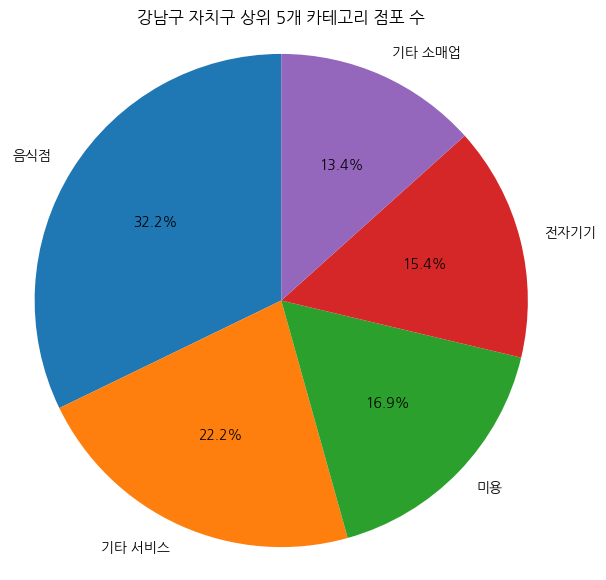

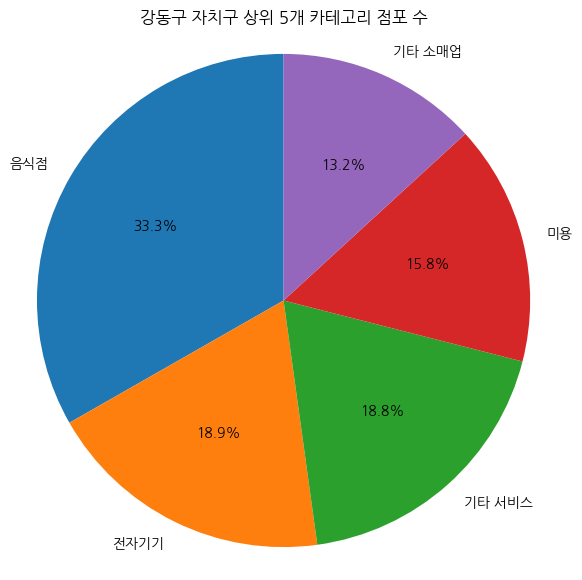

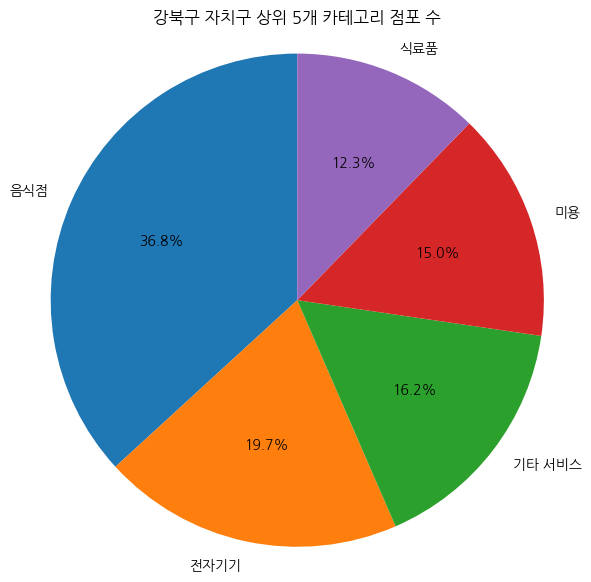

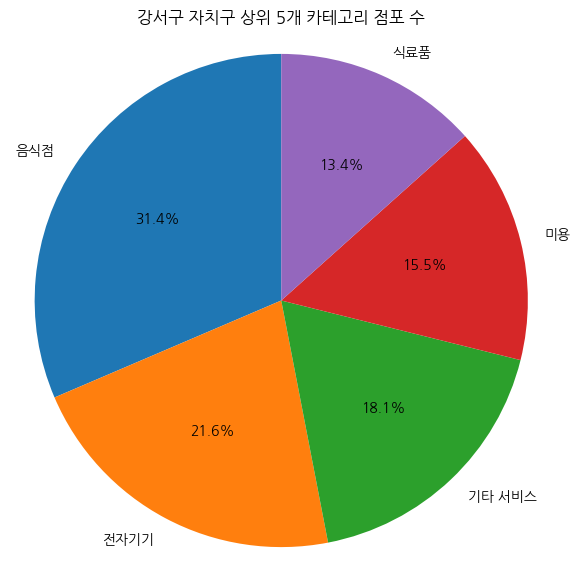

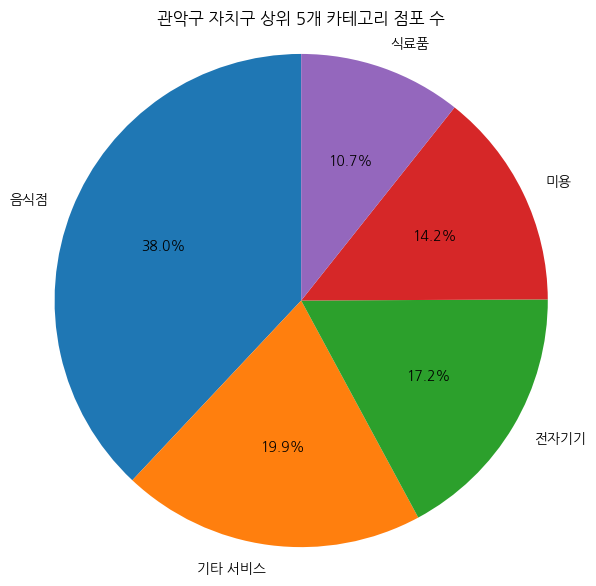

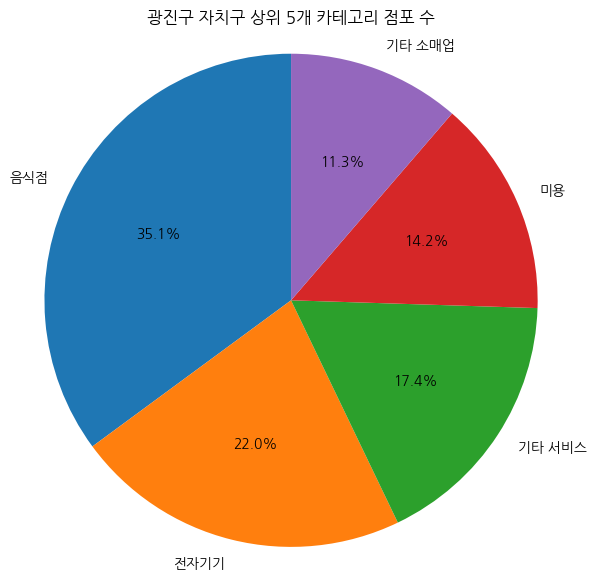

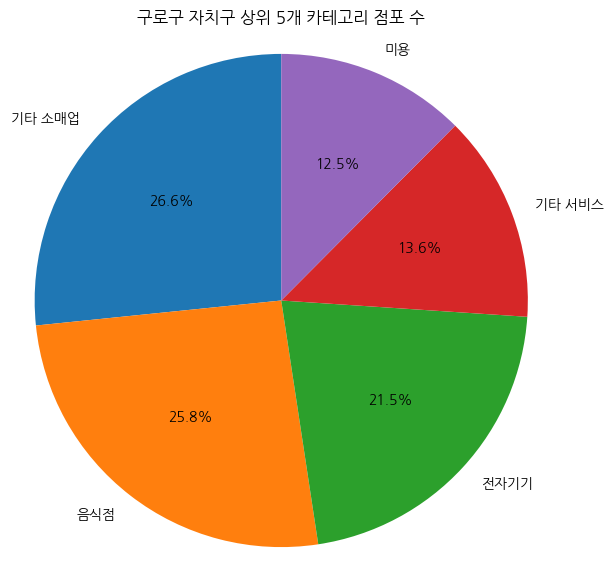

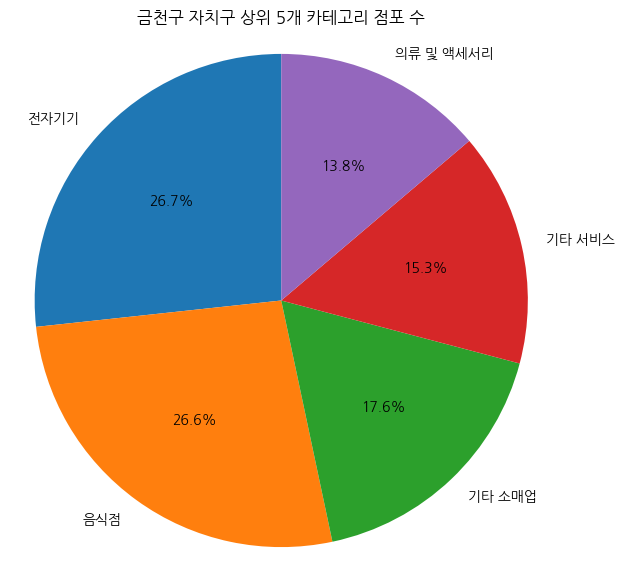

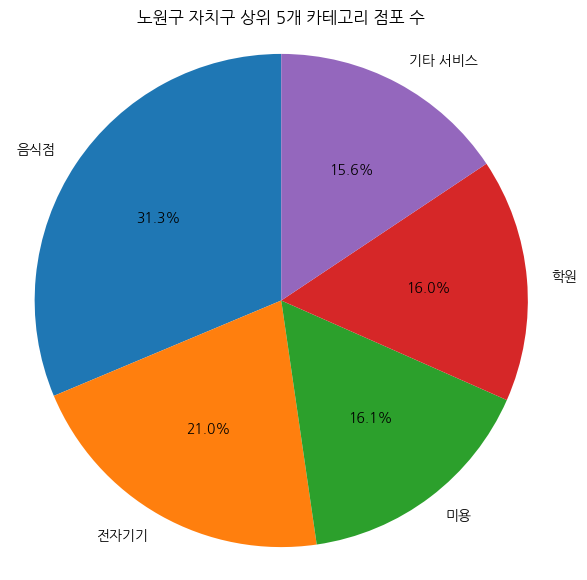

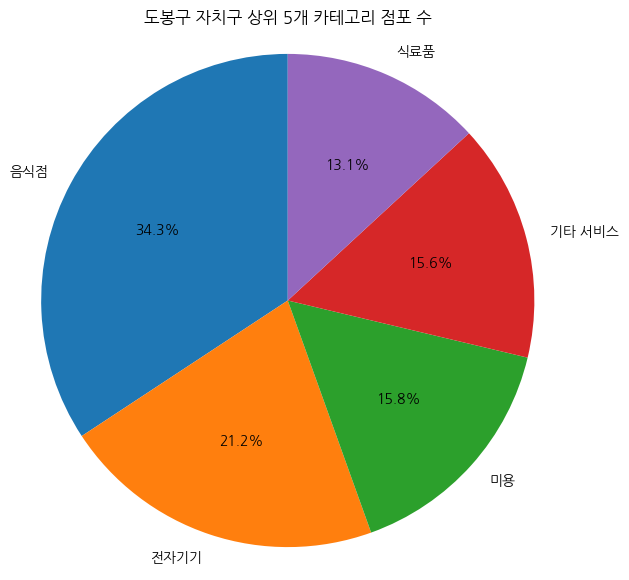

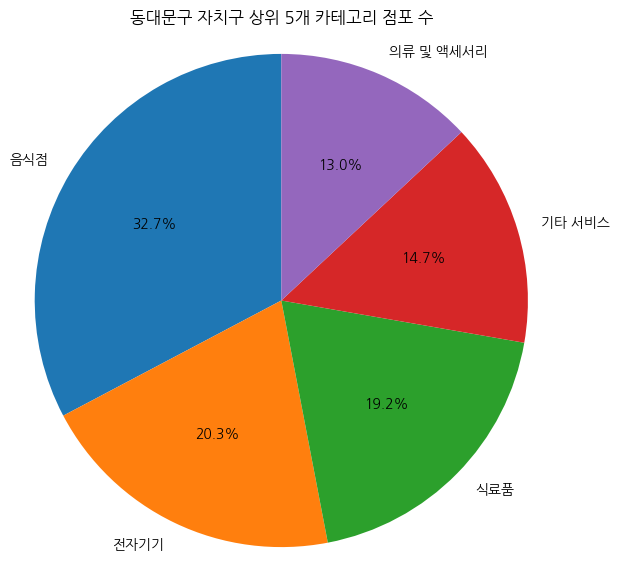

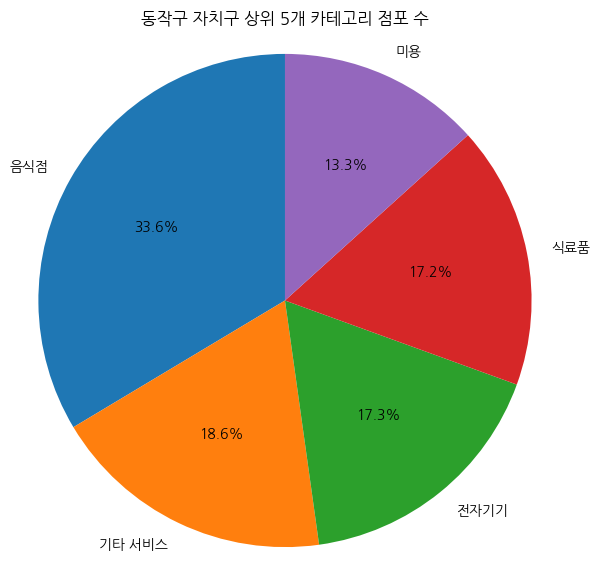

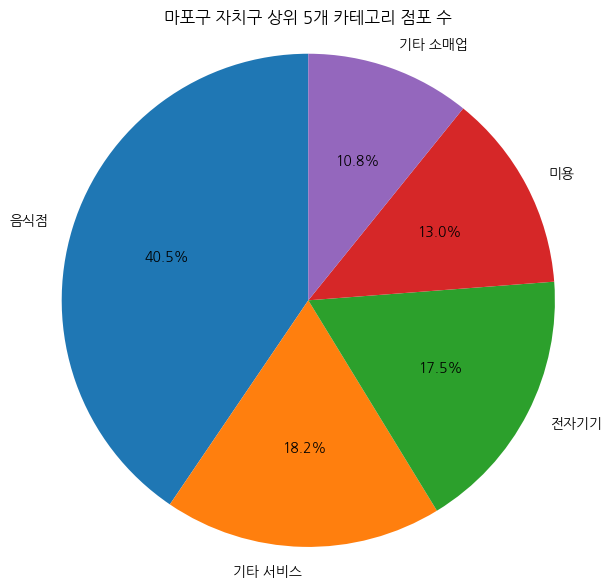

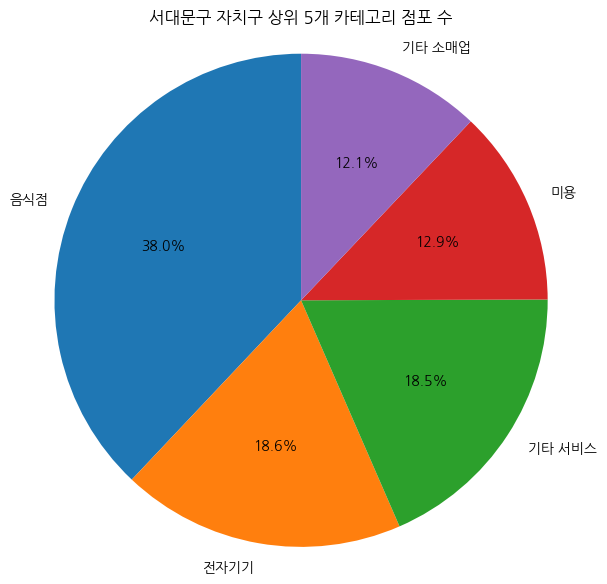

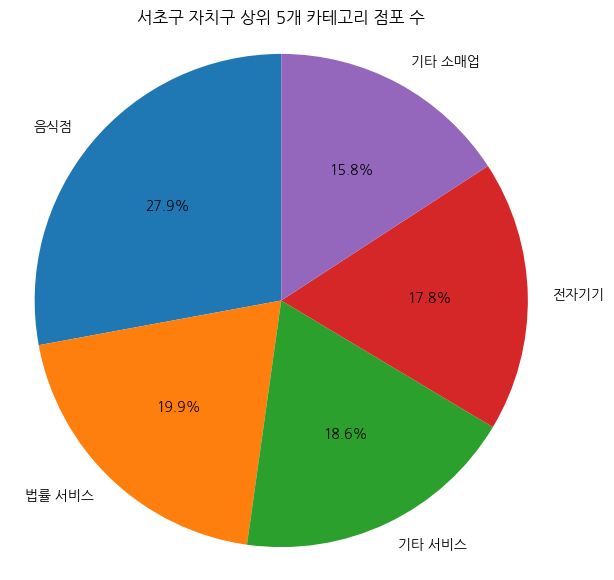

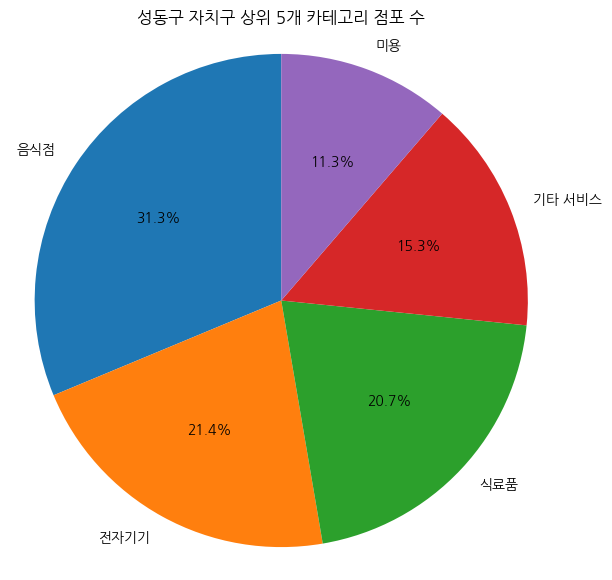

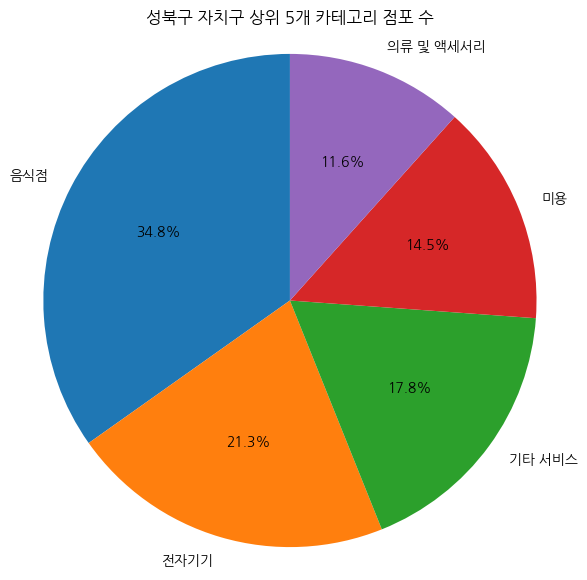

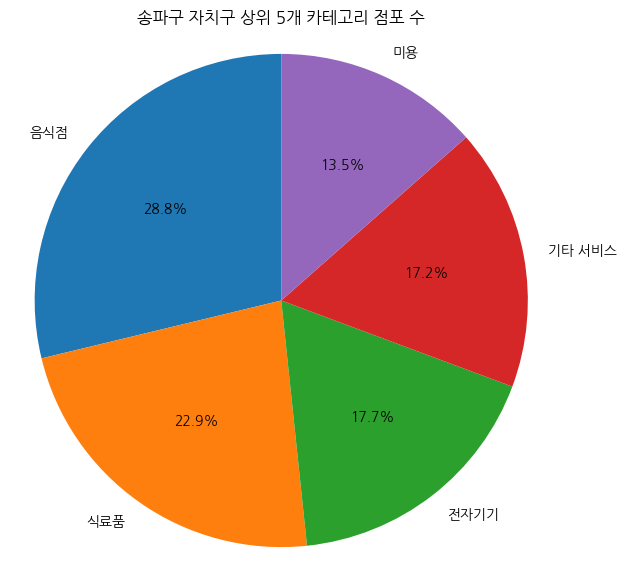

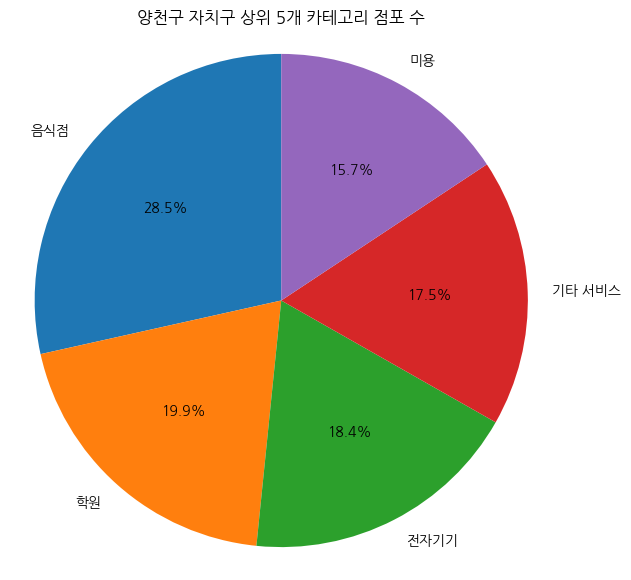

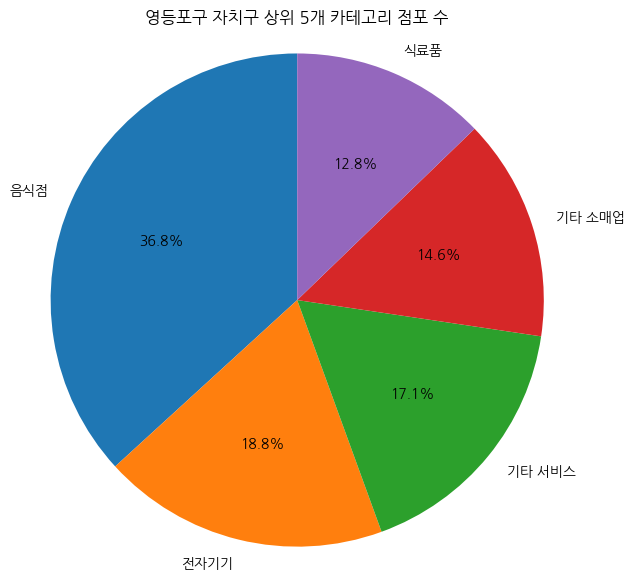

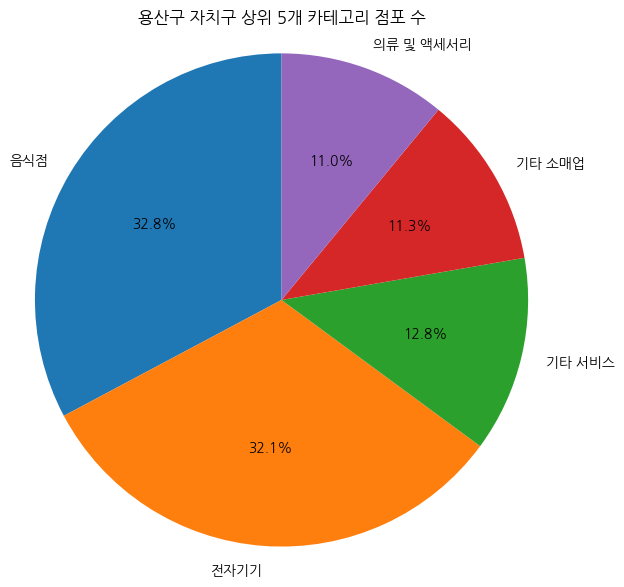

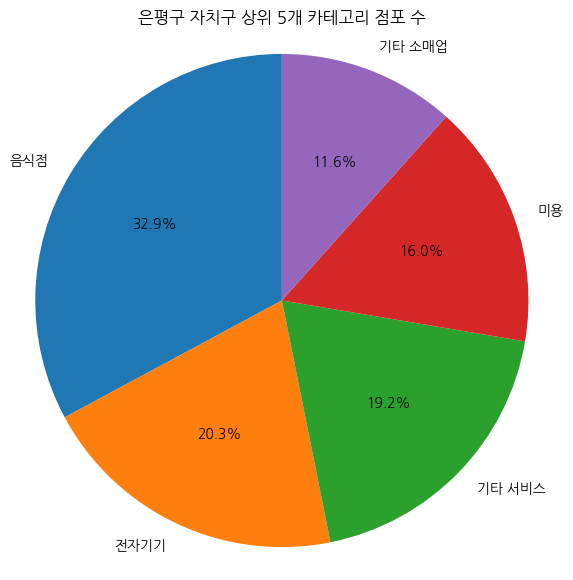

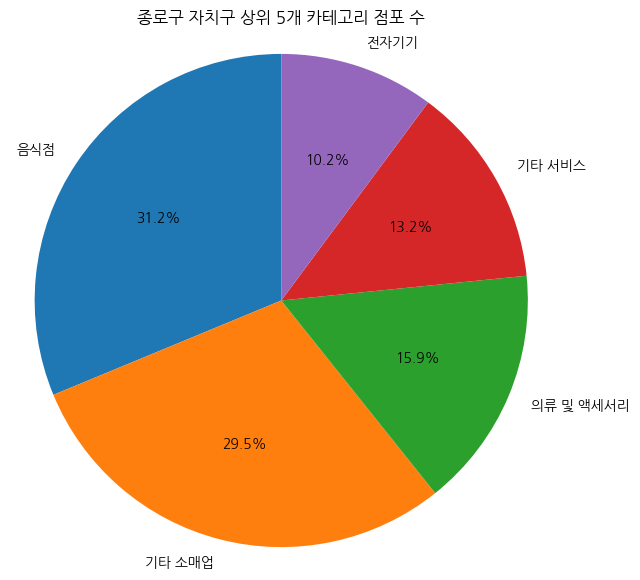

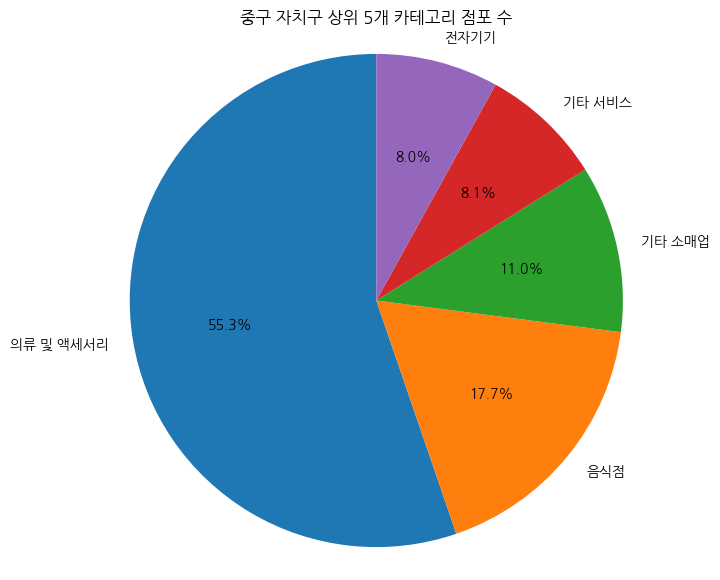

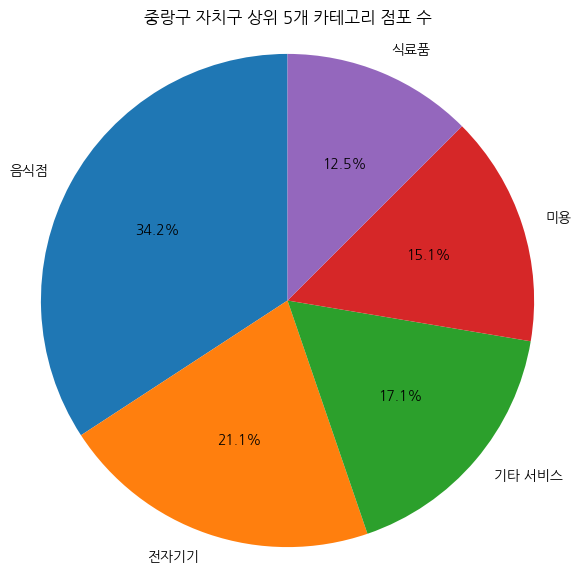

In [54]:
# 자치구별 상위 5개 점포 수 시각화
for district in df3['자치구_코드_명'].unique():
    district_data = df3[df3['자치구_코드_명'] == district]
    plt.figure(figsize=(7, 7))
    plt.pie(district_data['점포_수'], labels=district_data['카테고리'], autopct='%1.1f%%', startangle=90)
    plt.title(f"{district} 자치구 상위 5개 카테고리 점포 수")
    plt.axis('equal')  # 파이 차트의 비율을 유지
    plt.show()

In [55]:
## 체육시설
df1 = pd.read_excel("/content/drive/MyDrive/GDGoc/2/공공체육시설_20250123064719.xlsx")
df1.head()

/usr/local/lib/python3.11/dist-packages/openpyxl/styles/stylesheet.py:237: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


,자치구별(1),자치구별(2),2023
0,자치구별(1),자치구별(2),합계
1,자치구별(1),자치구별(2),개소 (개소)
2,합계,소계,3204
3,NaN,종로구,41
4,NaN,중구,32


In [56]:
# 데이터 정리 및 타입 변환
df1 = df1.drop(index=[0, 1, 2])  # 불필요한 행 제거
df1 = df1.drop(columns = ['자치구별(1)'])
df1[['체육시설 개수']] = df1[['2023']].apply(pd.to_numeric, errors='coerce')

# df의 [자치구 이름] 기준으로 병합
df = df.merge(df1, left_on="자치구 이름", right_on="자치구별(2)", how="left")
df = df.drop(columns=["자치구별(2)"])
df.head()

,자치구 이름,2014년 범죄 발생 건수,2015년 범죄 발생 건수,2016년 범죄 발생 건수,2017년 범죄 발생 건수,2018년 범죄 발생 건수,2019년 범죄 발생 건수,2020년 범죄 발생 건수,2021년 범죄 발생 건수,2022년 범죄 발생 건수,...,top3_commercials,top4_commercials,top5_commercials,top1_count,top2_count,top3_count,top4_count,top5_count,2023,체육시설 개수
0,종로구,5021,4705,4459,4057,3690,3846,3102,2712,3138,...,의류 및 액세서리,기타 서비스,전자기기,131216.0,123811.0,66647.0,55597.0,42657.0,41,41
1,중구,5231,4954,4584,4184,4030,4327,3411,2861,3071,...,기타 소매업,기타 서비스,전자기기,372775.0,119341.0,73920.0,54337.0,54229.0,32,32
2,용산구,3799,3820,4137,4060,3411,3313,2969,2381,2967,...,기타 서비스,기타 소매업,의류 및 액세서리,101047.0,98994.0,39552.0,34791.0,33835.0,39,39
3,성동구,3582,3358,3026,2767,2457,2512,2362,2112,2194,...,식료품,기타 서비스,미용,82029.0,56162.0,54285.0,40106.0,29678.0,113,113
4,광진구,6268,5909,5322,4646,3915,4011,3601,3087,3619,...,기타 서비스,미용,기타 소매업,95684.0,60076.0,47357.0,38659.0,30872.0,115,115


In [57]:
## 도서관 개수
df1 = pd.read_csv("/content/drive/MyDrive/GDGoc/1/서울시 공공도서관 현황정보.csv", encoding = "cp949")
df1.head()

,도서관 일련번호,도서관명,구 코드,구명,주소,전화번호,홈페이지 URL,운영시간,정기 휴관일,도서관 구분,도서관 구분명,위도,경도
0,1935,강남구립못골도서관,8,강남구,서울특별시 강남구 자곡로 116,02-459-5522,http://library.gangnam.go.kr/mglib,"평일 : 09:00~22:00, 주말 : 09:00~22:00",매주 화요일 및 법정공휴일,1,공공도서관,37.471538,127.096582
1,1066,강남역삼푸른솔도서관,8,강남구,서울특별시 강남구 테헤란로8길 36. 4층,02-2051-1178,https://library.gangnam.go.kr/ysplib/index.do,"평일 : 09:00~18:00, 주말 : 09:00~17:00",매주 화요일 및 법정 공휴일,1,공공도서관,37.496497,127.032027
2,2815,개포하늘꿈도서관,8,강남구,서울특별시 강남구 개포로 110길 54,02-451-1511,https://library.gangnam.go.kr/hnkklib/,"평일 : 09:00~22:00, 주말 : 09:00~17:00",매주 화요일 및 법정공휴일,1,공공도서관,37.490669,127.080357
3,48,논현도서관,8,강남구,서울특별시 강남구 학동로43길 17(논현동) 논현2동주민센터 6층,02-3443-7650,https://library.gangnam.go.kr/nhlib,"평일 : 09:00~22:00, 주말 : 09:00~17:00",매주 화요일 및 법정공휴일,1,공공도서관,37.517278,127.037188
4,2843,논현문화마루도서관,8,강남구,"서울특별시 강남구 논현로131길 40, 4~5층",02-512-8580,https://library.gangnam.go.kr/nmmlib,"평일 : 09:00~18:00, 주말 : 09:00~17:00",매주 월요일 및 법정공휴일,1,공공도서관,37.513844,127.027107


In [58]:
df2= df1.groupby("구명").size().reset_index(name="자치구별 도서관수")

# df의 [자치구 이름] 기준으로 병합
df = df.merge(df2, left_on="자치구 이름", right_on="구명", how="left")
df = df.drop(columns=["구명"])
df.head()

,자치구 이름,2014년 범죄 발생 건수,2015년 범죄 발생 건수,2016년 범죄 발생 건수,2017년 범죄 발생 건수,2018년 범죄 발생 건수,2019년 범죄 발생 건수,2020년 범죄 발생 건수,2021년 범죄 발생 건수,2022년 범죄 발생 건수,...,top4_commercials,top5_commercials,top1_count,top2_count,top3_count,top4_count,top5_count,2023,체육시설 개수,자치구별 도서관수
0,종로구,5021,4705,4459,4057,3690,3846,3102,2712,3138,...,기타 서비스,전자기기,131216.0,123811.0,66647.0,55597.0,42657.0,41,41,9
1,중구,5231,4954,4584,4184,4030,4327,3411,2861,3071,...,기타 서비스,전자기기,372775.0,119341.0,73920.0,54337.0,54229.0,32,32,8
2,용산구,3799,3820,4137,4060,3411,3313,2969,2381,2967,...,기타 소매업,의류 및 액세서리,101047.0,98994.0,39552.0,34791.0,33835.0,39,39,4
3,성동구,3582,3358,3026,2767,2457,2512,2362,2112,2194,...,기타 서비스,미용,82029.0,56162.0,54285.0,40106.0,29678.0,113,113,7
4,광진구,6268,5909,5322,4646,3915,4011,3601,3087,3619,...,미용,기타 소매업,95684.0,60076.0,47357.0,38659.0,30872.0,115,115,8


In [59]:
## 전시관 시설 개수
df1 = pd.read_csv("/content/drive/MyDrive/GDGoc/국내 문화체육관광 분야 전시관 시설 데이터.csv")
df1.head()

,ID,LCLAS_NM,MLSFC_NM,POI_ID,POI_NM,BHF_NM,ASSTN_NM,CL_CD,CL_NM,PNU,...,RDNMADR_CD,RDNMADR_NM,BULD_NO,LC_LO,LC_LA,GID_CD,LAST_CHG_DE,ORIGIN_NM,FILE_NM,BASE_DE
0,KCDMEPO23N000000001,장소,문화시설,161680,응접소파전시장,NaN,NaN,100103,기타전시/박물관,2635010400110760009,...,2.635042e+11,재송1로32번길,28,129.122485,35.186544,마라477891,20240105,KT,KC_491_WNTY_PRKLT_2023,20231220
1,KCDMEPO23N000000002,장소,문화시설,164955,민들레소극장,NaN,NaN,100203,공연/연극/문화센터,2911010600100380008,...,2.911043e+11,예술길,27,126.919081,35.149688,다라470839,20240105,KT,KC_491_WNTY_PRKLT_2023,20231220
2,KCDMEPO23N000000003,장소,문화시설,165722,이펙스전시장,NaN,NaN,100103,기타전시/박물관,4825010200103020002,...,4.825049e+11,왕릉길,19,128.879513,35.234113,마라255940,20240105,KT,KC_491_WNTY_PRKLT_2023,20231220
3,KCDMEPO23N000000004,장소,문화시설,165865,미용기구전시장,NaN,NaN,100103,기타전시/박물관,3111010500101230001,...,3.111032e+11,학성로,119-1,129.324088,35.555925,마마653304,20240105,KT,KC_491_WNTY_PRKLT_2023,20231220
4,KCDMEPO23N000000005,장소,문화시설,168479,미다갤러리,NaN,NaN,100106,소형갤러리,2911010500100830000,...,2.911043e+11,중앙로196번길,29,126.918562,35.148952,다라470839,20240105,KT,KC_491_WNTY_PRKLT_2023,20231220


In [60]:
seoul = [
    '종로구', '중구', '용산구', '성동구', '광진구', '동대문구', '중랑구', '성북구', '강북구',
    '도봉구', '노원구', '은평구', '서대문구', '마포구', '양천구', '강서구', '구로구', '금천구',
    '영등포구', '동작구', '관악구', '서초구', '강남구', '송파구', '강동구'
]

In [61]:
# 데이터 정리 및 타입 변환
df1 = df1[['SIGNGU_NM', 'POI_NM', 'CL_NM']]
df1 = df1[df1['SIGNGU_NM'].isin(list(seoul))]

In [62]:
df1

,SIGNGU_NM,POI_NM,CL_NM
3,중구,미용기구전시장,기타전시/박물관
7,서초구,갤러리원,소형갤러리
11,중구,준갤러리,소형갤러리
12,강서구,푸루츠갤러리,소형갤러리
15,종로구,서울두레소극장,공연/연극/문화센터
...,...,...,...
11159,종로구,아티스트존,일반극장/영화관
11164,마포구,홍대스테이지,N
11166,중구,디오르디앤씨,일반극장/영화관
11170,중구,하우스신스리,N


In [63]:
# 자치구별 문화시설 개수 계산
df2 = df1['SIGNGU_NM'].value_counts().reset_index()
df2.columns = ['자치구 이름', '전시 및 공연장 개수']

# 병합
df = pd.merge(df, df2, on='자치구 이름', how='left')

In [64]:
df['문화체육시설 개수'] = df['체육시설 개수']+df['자치구별 도서관수'] + df['전시 및 공연장 개수']

In [65]:
df['문화시설 순위'] = df['문화체육시설 개수'].rank(ascending=False)

In [66]:
df

,자치구 이름,2014년 범죄 발생 건수,2015년 범죄 발생 건수,2016년 범죄 발생 건수,2017년 범죄 발생 건수,2018년 범죄 발생 건수,2019년 범죄 발생 건수,2020년 범죄 발생 건수,2021년 범죄 발생 건수,2022년 범죄 발생 건수,...,top2_count,top3_count,top4_count,top5_count,2023,체육시설 개수,자치구별 도서관수,전시 및 공연장 개수,문화체육시설 개수,문화시설 순위
0,종로구,5021,4705,4459,4057,3690,3846,3102,2712,3138,...,123811.0,66647.0,55597.0,42657.0,41,41,9,930,980,1.0
1,중구,5231,4954,4584,4184,4030,4327,3411,2861,3071,...,119341.0,73920.0,54337.0,54229.0,32,32,8,570,610,3.0
2,용산구,3799,3820,4137,4060,3411,3313,2969,2381,2967,...,98994.0,39552.0,34791.0,33835.0,39,39,4,153,196,14.0
3,성동구,3582,3358,3026,2767,2457,2512,2362,2112,2194,...,56162.0,54285.0,40106.0,29678.0,113,113,7,52,172,18.0
4,광진구,6268,5909,5322,4646,3915,4011,3601,3087,3619,...,60076.0,47357.0,38659.0,30872.0,115,115,8,53,176,17.0
5,동대문구,4363,4720,4787,3975,3680,3692,3401,2959,3253,...,56759.0,53822.0,41143.0,36467.0,62,62,10,33,105,23.0
6,중랑구,5353,5193,5041,4571,4288,4268,3726,3210,3599,...,48928.0,39734.0,35171.0,29073.0,137,137,6,11,154,20.0
7,성북구,4606,4154,3744,3434,3042,2877,2567,2411,2749,...,52508.0,43886.0,35807.0,28735.0,161,161,13,77,251,8.0
8,강북구,4030,4257,4229,3393,3437,3838,2770,2301,2832,...,38925.0,31874.0,29663.0,24240.0,148,148,7,22,177,16.0
9,도봉구,3124,2664,2438,1999,2249,2110,2179,1860,2141,...,34526.0,25678.0,25349.0,21364.0,101,101,10,23,134,21.0


In [67]:
df = df.drop(columns=['2023', '체육시설 개수', '자치구별 도서관수', '전시 및 공연장 개수'])

In [72]:
df=df.drop(columns=['평당 임대료(만원)'])

In [76]:
df = df.drop(columns=['prcs_spd','prcs_trv_time','이동속도','이동시간'])

In [77]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 52 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   자치구 이름            25 non-null     object 
 1   2014년 범죄 발생 건수    25 non-null     int64  
 2   2015년 범죄 발생 건수    25 non-null     int64  
 3   2016년 범죄 발생 건수    25 non-null     int64  
 4   2017년 범죄 발생 건수    25 non-null     int64  
 5   2018년 범죄 발생 건수    25 non-null     int64  
 6   2019년 범죄 발생 건수    25 non-null     int64  
 7   2020년 범죄 발생 건수    25 non-null     int64  
 8   2021년 범죄 발생 건수    25 non-null     int64  
 9   2022년 범죄 발생 건수    25 non-null     int64  
 10  2023년 범죄 발생 건수    25 non-null     int64  
 11  범죄 발생 빈도          25 non-null     object 
 12  cctv              25 non-null     object 
 13  경찰서 개수            25 non-null     float64
 14  소방서 개수            25 non-null     float64
 15  종합 안전/치안 점수       25 non-null     float64
 16  안전 치안 순위          25 non-null     int64  
 17 

In [78]:
df.to_excel("동네.xlsx")

In [81]:
# 칼럼명 변경
column_mapping = {
    "자치구 이름": "town_name",
    "2014년 범죄 발생 건수": "crime_2014",
    "2015년 범죄 발생 건수": "crime_2015",
    "2016년 범죄 발생 건수": "crime_2016",
    "2017년 범죄 발생 건수": "crime_2017",
    "2018년 범죄 발생 건수": "crime_2018",
    "2019년 범죄 발생 건수": "crime_2019",
    "2020년 범죄 발생 건수": "crime_2020",
    "2021년 범죄 발생 건수": "crime_2021",
    "2022년 범죄 발생 건수": "crime_2022",
    "2023년 범죄 발생 건수": "crime_2023",
    "범죄 발생 빈도": "crime_frequency",
    "cctv": "cctv_count",
    "경찰서 개수": "police_stations",
    "소방서 개수": "fire_stations",
    "종합 안전/치안 점수": "safety_score",
    "안전 치안 순위": "safety_rank",
    "평당 월세(만원)": "monthly_rent",
    "평당 전세(만원)": "yearly_rent",
    "2401 매매": "sale_2401",
    "2402 매매": "sale_2402",
    "2403 매매": "sale_2403",
    "2404 매매": "sale_2404",
    "2405 매매": "sale_2405",
    "2406 매매": "sale_2406",
    "2407 매매": "sale_2407",
    "2408 매매": "sale_2408",
    "2409 매매": "sale_2409",
    "2410 매매": "sale_2410",
    "2411 매매": "sale_2411",
    "2412 매매": "sale_2412",
    "2501 매매": "sale_2501",
    "1년전 매매가 차이": "sales_difference",
    "버스 이용 비율": "bus_ratio",
    "지하철 이용 비율": "subway_ratio",
    "택시 이용 비율": "taxi_ratio",
    "많이 이용한 대중교통": "most_used_transport",
    "혼잡도 점수": "congestion_score",
    "도로 혼잡도": "road_congestion",
    "혼잡도 순위": "congestion_rank",
    "top1_commercials": "top1_commercial",
    "top2_commercials": "top2_commercial",
    "top3_commercials": "top3_commercial",
    "top4_commercials": "top4_commercial",
    "top5_commercials": "top5_commercial",
    "top1_count": "top1_count",
    "top2_count": "top2_count",
    "top3_count": "top3_count",
    "top4_count": "top4_count",
    "top5_count": "top5_count",
    "문화체육시설 개수": "facility_count",
    "문화시설 순위": "facility_rank",
}


df.rename(columns=column_mapping, inplace=True)
df.to_excel("동네_영어.xlsx")